In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing Excel data
data = pd.read_excel('lecture_portfolio.xlsx')

# Set dates as dataframe index
data.set_index('Date', inplace=True)
data

,AAL,CSCO,F,GE,JPM,NKE,SPY,UAL,XOM
Date,,,,,,,,,
2009-05-31,-0.318790,-0.041972,-0.037990,0.066084,0.118654,0.087760,0.058925,-0.054407,0.046877
2009-06-30,-0.058739,0.007509,0.055053,-0.124007,-0.076210,-0.089057,-0.001254,-0.314578,0.007476
2009-07-31,0.205789,0.180188,0.317985,0.143372,0.134790,0.093886,0.074633,0.291563,0.006893
2009-08-31,0.159974,-0.019063,-0.050436,0.036878,0.124015,-0.022504,0.036504,0.511701,-0.012051
2009-09-30,0.382362,0.089824,-0.051307,0.188294,0.008293,0.173593,0.035466,0.479945,-0.007800
...,...,...,...,...,...,...,...,...,...
2021-08-31,-0.021409,0.066101,-0.065769,0.017652,0.054009,-0.014732,0.029941,-0.004314,-0.038464
2021-09-30,0.029087,-0.077770,0.086723,-0.021818,0.023382,-0.118429,-0.046605,0.022791,0.078870
2021-10-31,-0.064056,0.035511,0.206486,0.018130,0.044402,0.152169,0.070435,-0.029789,0.096327


# Stats

In [3]:
# Mean, Standard Deviation, and Sharpe
mu = data.mean()
std = data.std()
sharpe = mu / std
stats = pd.DataFrame({'Mean Return':mu, 'Volatility':std, 'Sharpe': sharpe})
stats

,Mean Return,Volatility,Sharpe
AAL,0.021015,0.149843,0.140244
CSCO,0.012199,0.073078,0.166927
F,0.014591,0.093436,0.156165
GE,0.005471,0.089599,0.061065
JPM,0.014639,0.072519,0.201870
NKE,0.019656,0.064758,0.303528
SPY,0.013257,0.039891,0.332332
UAL,0.023995,0.143720,0.166954
XOM,0.004232,0.064274,0.065846


In [4]:
# Covariance
data.cov()

,AAL,CSCO,F,GE,JPM,NKE,SPY,UAL,XOM
AAL,0.022453,0.002636,0.005970,0.004165,0.003208,0.002138,0.002040,0.016187,0.001879
CSCO,0.002636,0.005340,0.002888,0.002301,0.002642,0.001665,0.001834,0.002912,0.001684
F,0.005970,0.002888,0.008730,0.003697,0.003499,0.001804,0.002100,0.005080,0.002621
GE,0.004165,0.002301,0.003697,0.008028,0.003521,0.001812,0.001955,0.004731,0.002731
JPM,0.003208,0.002642,0.003499,0.003521,0.005259,0.001457,0.002114,0.003635,0.002554
NKE,0.002138,0.001665,0.001804,0.001812,0.001457,0.004194,0.001349,0.002403,0.001013
SPY,0.002040,0.001834,0.002100,0.001955,0.002114,0.001349,0.001591,0.002142,0.001697
UAL,0.016187,0.002912,0.005080,0.004731,0.003635,0.002403,0.002142,0.020656,0.001869
XOM,0.001879,0.001684,0.002621,0.002731,0.002554,0.001013,0.001697,0.001869,0.004131


# Mean Variance


AAL    -0.004421
CSCO   -0.146570
F      -0.000828
GE     -0.189041
JPM     0.018942
NKE     0.252251
SPY     1.390724
UAL     0.048748
XOM    -0.369806
dtype: float64


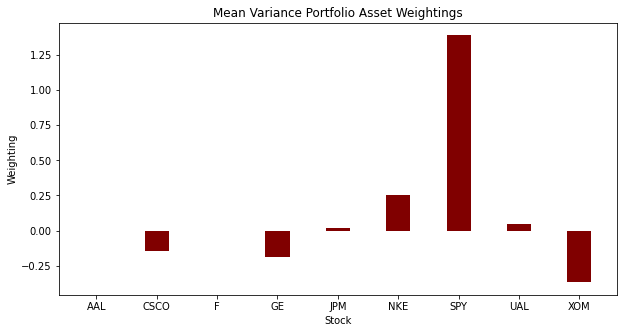

In [23]:
mu = data.mean()
Sigma = data.cov()
Sigma_inv = np.linalg.inv(Sigma)

# Option 1 to calculate weights of tangency portfolio
N = mu.shape[0]
weights = Sigma_inv @ mu / (np.ones(N) @ Sigma_inv @ mu)

# Option 2 (easier) to calculate weights of tangency portfolio
weights = Sigma_inv @ mu
weights = weights / weights.sum()

wts_tan = pd.Series(weights, index = mu.index)

# Plotting
wts_tan_dict = wts_tan.to_dict()
assets = list(wts_tan_dict.keys())
weighting = list(wts_tan_dict.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(assets, weighting, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Weighting")
plt.title("Mean Variance Portfolio Asset Weightings")
print(wts_tan)
plt.show()

# Mean Variance Function


In [6]:
def tangency(returns):
    mu = returns.mean()
    Sigma = returns.cov()
    Sigma_inv = np.linalg.inv(Sigma)
    
    weights = Sigma_inv @ mu
    weights = weights / weights.sum()
    
    wts_tan = pd.Series(weights, index = mu.index)
    
    return wts_tan

# Mean Variance Analysis

In [7]:
returns = data @ wts_tan
ret_mean = returns.mean()
ret_std = returns.std() 
ret_sharpe = ret_mean / ret_std 
stats.loc['Tangency'] = [ret_mean, ret_std, ret_sharpe] 
stats

,Mean Return,Volatility,Sharpe
AAL,0.021015,0.149843,0.140244
CSCO,0.012199,0.073078,0.166927
F,0.014591,0.093436,0.156165
GE,0.005471,0.089599,0.061065
JPM,0.014639,0.072519,0.201870
NKE,0.019656,0.064758,0.303528
SPY,0.013257,0.039891,0.332332
UAL,0.023995,0.143720,0.166954
XOM,0.004232,0.064274,0.065846
Tangency,0.020350,0.046708,0.435682


# Scalar Adjustment For Target Return

In [8]:
target = .075
mu = data.mean()
sigma = data.cov()

# Delta is the scalar multiple for the tangency weights
delta = ((np.ones((1,sigma.shape[0])) @ np.linalg.inv(sigma) @ mu) / (mu @ np.linalg.inv(sigma) @ mu)) * target

# Multiple delta by tangency weights to get adjusted portfolio
wts_star = delta * wts_tan
wts_star

AAL    -0.016293
CSCO   -0.540194
F      -0.003050
GE     -0.696724
JPM     0.069813
NKE     0.929691
SPY     5.125615
UAL     0.179665
XOM    -1.362949
dtype: float64

In [9]:
# Returns
returns = data @ wts_star
ret_mean = returns.mean()
ret_std = returns.std()
ret_sharpe = ret_mean / ret_std
stats.loc['Adjusted'] = [ret_mean, ret_std, ret_sharpe] 
stats

,Mean Return,Volatility,Sharpe
AAL,0.021015,0.149843,0.140244
CSCO,0.012199,0.073078,0.166927
F,0.014591,0.093436,0.156165
GE,0.005471,0.089599,0.061065
JPM,0.014639,0.072519,0.201870
NKE,0.019656,0.064758,0.303528
SPY,0.013257,0.039891,0.332332
UAL,0.023995,0.143720,0.166954
XOM,0.004232,0.064274,0.065846
Tangency,0.020350,0.046708,0.435682


# Diagonalization

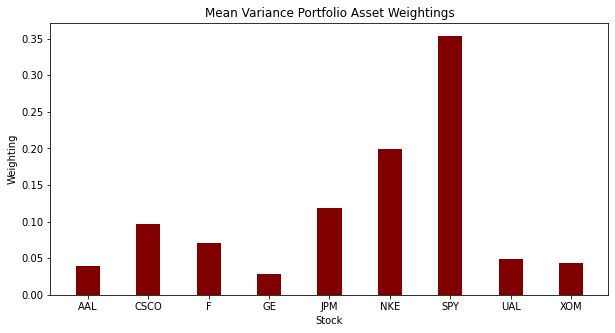

In [21]:
mu = data.mean()
Sigma = data.cov()

# Diagonalizing
sig_d = np.zeros(Sigma.shape)
np.fill_diagonal(sig_d,Sigma.to_numpy().diagonal())
Sigma = sig_d

Sigma_inv = np.linalg.inv(Sigma)
weights = mu @ Sigma_inv
weights = weights / weights.sum()
wts_tan = pd.Series(weights, index = mu.index)

# Plotting
wts_tan_dict = wts_tan.to_dict()
assets = list(wts_tan_dict.keys())
weighting = list(wts_tan_dict.values())

fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(assets, weighting, color ='maroon',
        width = 0.4)
 
plt.xlabel("Stock")
plt.ylabel("Weighting")
plt.title("Mean Variance Portfolio Asset Weightings")
plt.show()

In [11]:
# Returns
returns = data @ wts_tan
ret_mean = returns.mean()
ret_std = returns.std()
ret_sharpe = ret_mean / ret_std
stats.loc['Diag'] = [ret_mean, ret_std, ret_sharpe] 
stats

,Mean Return,Volatility,Sharpe
AAL,0.021015,0.149843,0.140244
CSCO,0.012199,0.073078,0.166927
F,0.014591,0.093436,0.156165
GE,0.005471,0.089599,0.061065
JPM,0.014639,0.072519,0.201870
NKE,0.019656,0.064758,0.303528
SPY,0.013257,0.039891,0.332332
UAL,0.023995,0.143720,0.166954
XOM,0.004232,0.064274,0.065846
Tangency,0.020350,0.046708,0.435682
